# Course Project Part 2
#### Nikhil Pereira (nmp54) and Julia Hoffman (jh2334)
#### March 16th, 2022

## Loading in Clean Data from Part 1

In [ ]:
from google.colab import drive
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

# julia file path
#colab_path = '/content/drive/MyDrive/LID/CS_subset.csv'

# nikhil file path
colab_path = '/content/drive/MyDrive/Code Shared/LID Project/cleaned.csv'
#names_path = '/content/drive/MyDrive/Code Shared/LID Project/CS_subset_dict.csv'
#pd.read_csv('u.item', sep='|', names=m_cols, encoding='latin-1')
cleaned = pd.read_csv(colab_path, encoding='latin-1')
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cleaned

,Unnamed: 0,INSTNM,CITY,STABBR,PREDDEG,CONTROL,SAT_AVG,UGDS,UGDS_WHITE,UGDS_BLACK,...,NPT4_PRIV,PCTPELL,RET_FT4,PCTFLOAN,GRAD_DEBT_MDN10YR_SUPP,Graduation Rate Over 50%,Median Salary 1+,STABBR_CONTROL,SAT_AVG_COMP,Tuition
0,0,Alabama A & M University,Normal,AL,3,1,823.0,4051.0,0.0279,0.9501,...,NaN,0.7115,0.6314,0.8204,373.156554,0,31400.0,AL1,1036.0,13415.0
1,1,University of Alabama at Birmingham,Birmingham,AL,3,1,1146.0,11200.0,0.5987,0.2590,...,NaN,0.3505,0.8016,0.5397,256.646090,1,40300.0,AL1,1036.0,14805.0
2,2,University of Alabama in Huntsville,Huntsville,AL,3,1,1180.0,5525.0,0.7012,0.1310,...,NaN,0.3281,0.8098,0.4728,274.642513,0,46600.0,AL1,1036.0,17520.0
3,3,Alabama State University,Montgomery,AL,3,1,830.0,5354.0,0.0161,0.9285,...,NaN,0.8265,0.6219,0.8735,371.385777,0,27800.0,AL1,1036.0,11936.0
4,4,The University of Alabama,Tuscaloosa,AL,3,1,1171.0,28692.0,0.7865,0.1140,...,NaN,0.2107,0.8700,0.4148,266.449200,1,42400.0,AL1,1036.0,20916.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1722,University of Phoenix-Augusta Campus,Augusta,GA,3,3,1050.0,735.0,0.1456,0.4830,...,17728.0,0.7212,0.3846,0.6674,394.122775,0,53400.0,GA3,NaN,17728.0
1723,1723,University of Phoenix-Chattanooga Campus,Chattanooga,TN,3,3,1050.0,408.0,0.3971,0.2426,...,18896.0,0.7737,0.4375,0.7596,394.122775,0,53400.0,TN3,NaN,18896.0
1724,1724,Argosy University-Phoenix Online Division,Phoenix,AZ,3,3,1050.0,8917.0,0.5140,0.3068,...,31831.0,0.7090,0.2901,0.6546,159.014662,0,38200.0,AZ3,NaN,31831.0
1725,1725,New Hope Christian College-Honolulu,Honolulu,HI,3,2,1005.0,126.0,0.2143,0.0159,...,14601.0,0.4472,0.8500,0.4309,274.342758,0,23200.0,HI2,1005.0,14601.0


In [ ]:
# Splitting into train test split
import numpy as np
from sklearn.model_selection import train_test_split

# Establishing design matrix and potential responses 
X = cleaned.drop(columns = ['Graduation Rate Over 50%', 'Median Salary 1+', 'STABBR_CONTROL', 'SAT_AVG_COMP','UGDS_NRA', 'NPT4_PUB', 'NPT4_PRIV', 'SAT_AVG_COMP', 'INSTNM','CITY'])

# Making dummy variables for the states
encoded_states = pd.get_dummies(X.STABBR, prefix='STATE')
X = pd.concat([X, encoded_states], axis = 1).drop(columns = ['STABBR'])

y = cleaned[['Graduation Rate Over 50%', 'Median Salary 1+']]

# Splitting the data into a test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 1 Inference on the outcome variables


#### (a) Estimate the mean of your continuous outcome variable. Estimate the mean of your binary outcome variable (i.e., the fraction of rows for which this variable is 1).

In [ ]:
means = y_train.describe().loc['mean',:].to_frame()
variances = y_train.var().to_frame()
stat=pd.concat([means,variances],axis=1).rename(columns = {0:'variance'})
stat['variance'] = stat['variance']
stat

,mean,variance
Graduation Rate Over 50%,0.498914,2.501800e-01
Median Salary 1+,41477.914555,1.122361e+08


In [ ]:
grad_mean = stat.loc['Graduation Rate Over 50%'][0]
salary_mean = stat.loc['Median Salary 1+'][0]
grad_std = np.sqrt(stat.loc['Graduation Rate Over 50%'][1])
salary_std = np.sqrt(stat.loc['Median Salary 1+'][1])
n = len(y_train)

#### (b) For both your continuous outcome variable and your binary outcome variable, construct a confidence interval around the mean. Explain any assumptions you made in constructing these intervals.

###### Confidence Interval for Binary Variable 'Graduation Rate over 50%'

In [ ]:
p = grad_mean
upper = p + 1.96 * np.sqrt((p*(1-p))/n)
lower = p - 1.96 * np.sqrt((p*(1-p))/n)
print('confidence interval: [%f, %f]'%(lower, upper))

confidence interval: [0.472543, 0.525285]


###### Distribution of Median Salary from Sample

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


(array([ 36., 157., 549., 416., 177.,  23.,  15.,   6.,   1.,   1.]),
 array([ 11800.,  21680.,  31560.,  41440.,  51320.,  61200.,  71080.,
         80960.,  90840., 100720., 110600.]),
 <a list of 10 Patch objects>)

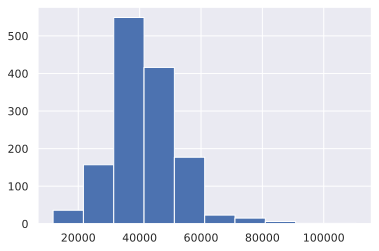

In [ ]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
hist(y_train['Median Salary 1+'])

###### 95% Confidence Interval for Median Salary 1+ based on Student t-test

In [ ]:
import scipy as sp
import scipy.stats
mu0 = 55260 # average salary out of college in 2020
dataset = y_train['Median Salary 1+']
tn  = (dataset.mean()-mu0)*np.sqrt(n)/dataset.std(ddof=1)
p   = 2*(1-scipy.stats.t.cdf(abs(tn),n-1))
print('p-val for mu0=%f is %f'%(mu0,p))
## t confidence intervals
Q = sp.stats.t.ppf(1-.05/2,n-1)
print('confidence interval: [%f, %f]'%(dataset.mean()-Q*dataset.std(ddof=1)/np.sqrt(n),dataset.mean()+Q*dataset.std(ddof=1)/np.sqrt(n)))

p-val for mu0=55260.000000 is 0.000000
confidence interval: [40918.674178, 42037.154931]


##### Explain Assumptions 

For the binary variable 'Graduating Rate over 50%' we are assuming comes from a Bernoulli distribution and used the bernoulli CI formula to get an interval from [0.473, 0.525]. 

For the continous variable 'Median Salary 1+ After Graduation' we are assuming comes from a normal distribution and this is a safe assumption given our n is moderately large (1300+) by CLT. Therefore we can use the student t-test to quantify uncertainty in the mean. Our null hypothesis was that the median earnings is 55,260 from data in 2020. Under these assumptions this sample outputted a CI of [40918.67, 42037.15] median earnings.

#### (c) Do you believe your confidence intervals are valid? Why or why not?


##### Our null hypothesis for the binary variable 'Graduating Rate over 50%' was that 50% of colleges have a graduating rate over 50%. Since our CI contains 0.5, this suggests that 95% of the time our CI will contain the true proportion of colleges with 'Graduating Rate over 50%'. This means our CI is valid and significant.

##### Our null hypothesis for the continous variable 'Median Salary 1+ After Graduation' is that the median earnings is 55,260 from data in 2020. Since our CI does not contain 55,260, this suggest that our data underestimates the true median earnings of US graduates 95% of the time.



#### (d) For your continuous outcome variable, test for normality in two ways: (1) QQ plots, and (2) the K-S test. What can you conclude?


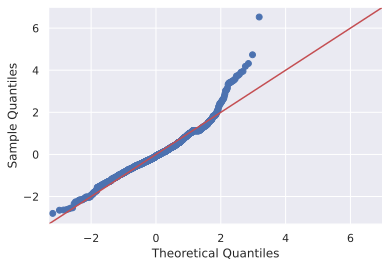

In [ ]:
## qq plot
import statsmodels.api as sm
fig = sm.graphics.qqplot(dataset, sp.stats.norm, fit=True, line='45')

In [ ]:
## test normality
import statsmodels.stats.api as sms
print(sms.diagnostic.kstest_normal(dataset))

(0.06025284796347252, 9.612695166855956e-13)


##### Conclusion on Normality Test

Since the data points on the QQ plot deviate from the red line and in the KS test we have a small p-value we reject the Ho hypothesis that the distribution from which this data came from is normal

#### (e) Choose a reasonable binary treatment variable. 

We want to study its effect on the continuous outcome variable. What is the mean outcome when the binary treatment variable is 0 and 1,
respectively? Use the Student’s t-test to give a 95% confidence interval for the difference in
these mean outcomes. Choose a test statistic and use a permutation test to report a p-value
for the hypothesis that this binary treatment variable has a non-zero effect on the outcome.
Explain how you chose the test statistic. What can you conclude based on the obtained p-value?
Note: If you do not have a suitable choice of a binary treatment variable in your dataset, create
your own from a continuous treatment variable (for example, 1 if your continuous treatment
variable exceeds a fixed threshold, and 0 otherwise).

##### Choosing a Binary Treatment Variable

We decided to partition the data based on if the school is Private (True-1) or Public (False-0)

In [ ]:
X_train['School Type'] = X_train.CONTROL > 1
X_train['School Type'].astype('int')
df = pd.concat([X_train, y_train], axis=1)
priv_mean = df['Median Salary 1+'][df['School Type']==1].mean()
pub_mean = df['Median Salary 1+'][df['School Type']==0].mean()
print('Private School Average Median Earnings', df['Median Salary 1+'][df['School Type']==1].mean())
print('Public School Average Medain Earnings', df['Median Salary 1+'][df['School Type']==0].mean())

Private School Average Median Earnings 41620.29136316337
Public School Average Medain Earnings 41152.142857142855


##### Perform Student T Test on Difference of Means for this Binary Treatment

In [ ]:
# T test (assume equal variance)
# T test
cm = sms.CompareMeans(
    sms.DescrStatsW(df['Median Salary 1+'][df['School Type']==1]),
    sms.DescrStatsW(df['Median Salary 1+'][df['School Type']==0])
)
print('95pct t-test CI (equal vars):', cm.tconfint_diff())
print('95pct t-test CI (Welch\'s):', cm.tconfint_diff(usevar='unequal'))
cm.summary()

95pct t-test CI (equal vars): (-747.6839277627469, 1683.9809398037787)
95pct t-test CI (Welch's): (-595.9837765966345, 1532.2807886376663)


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,468.1485,619.790,0.755,0.450,-747.684,1683.981


##### Perform Permutation Test on Difference of Means for this Binary Treatment

permutation pval = 0.27747225277472254


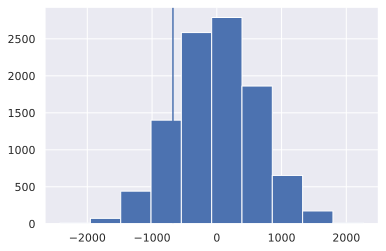

In [ ]:
y = np.array(df['Median Salary 1+'])
t = np.array(df['School Type']).astype('bool')
np.random.shuffle(t)
delta = y.dot(t)/t.sum() - y.dot(~t)/(~t).sum()
thetahat_fn = lambda y,t: np.mean(y[t==1])-np.mean(y[t==0])
thetahat = thetahat_fn(y,t)
B = 10000
permutations = np.zeros(B)
for i in range(B):
    np.random.shuffle(t)
    permutations[i] = thetahat_fn(y,t)
hist(permutations)
axvline(x=thetahat)
print('permutation pval =',(1.+(np.abs(permutations)>=np.abs(thetahat)).sum())/(B+1.))

##### What can you conclude based on the obtained p-value?

Based on the student t-test we obtained a p-value of 0.450 which is larger than our alpha 0.05 indicating that the mean difference (Private - Public Earnings) between private and public median earnings is not significant. We fail to reject the null hypothesis that the median earning difference is 0. Our CI for the t-test is (-747.68, 1683.98) saying that 95% of time the median earning difference is -$747 to $1683 and the interval also contains 0 reinforcing our hypothesis test. When assuming non-equal variance we get a similar CI (-595.98, 1532.28) by the Welches t-test.

Based on the permutation test we shuffled the public private treatment and measure the difference in median earnings. Since the p-value for our experiment is 0.2 which is greater than 0.05 we fail to reject the null hypothesis that the public and private earnings come from the same distribution. We do not have sufficient evidence that they come from different distributions (see histogram above). 

#### (f) Can you interpret your answer to part (e) causally? Why or why not?

No because we didnt assume ignorability in the dataset. There could be unexplained reasons why median earnings are the same between public and private schools in the US.


# 2 Investigating relationships

#### (a) For each treatment variable, run a simple regression against your outcome variables and report p-values for the slopes. What do you observe? Compare your results to question 2(g) from mini-project: part 1. Do higher estimated correlations always correspond to smaller p-values?


In [ ]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
features = "+".join(X_train.columns[1:16])
topfeatures = ['SAT_AVG', 'UGDS_ASIAN', 'RET_FT4', 'Tuition', 'UGDS_2MOR']
df = df.rename(columns={"Median Salary 1+": 'Salary', 'Graduation Rate Over 50%':'GraduationRate'})

In [ ]:
pvals = []
for feature in topfeatures:
  formula =  'Salary ~ ' + feature 
  lm = smf.ols(formula, data=df).fit()
  print(feature, 'pvalue', lm.pvalues[1])
  pvals.append([feature, lm.pvalues[1]])

pvals.sort(key=lambda x:x[1])

SAT_AVG pvalue 2.336278151351579e-90
UGDS_ASIAN pvalue 4.546258422106183e-71
RET_FT4 pvalue 6.077665228951527e-50
Tuition pvalue 1.3564360867430298e-33
UGDS_2MOR pvalue 6.831902577305637e-12


#### Do higher estimated correlations always correspond to smaller p-values?

Yes from part 2G we had the top 5 correlated covariates as 'SAT_AVG', 'UGDS_ASIAN', 'RET_FT4', 'Tuition', 'UGDS_2MOR'. When finding the p-value, the order stays the same in lowest p-value and significance.

#### (b) Fit a linear regression model with all treatment variables against your continuous outcome variable. 


In [ ]:
topfeatures = ['SAT_AVG', 'UGDS_ASIAN', 'RET_FT4', 'Tuition', 'UGDS_2MOR', 'PCTPELL', 'UGDS_BLACK','PCTFLOAN','UGDS_HISP','UGDS_AIAN']
formula = 'Salary ~' + "+".join(topfeatures)
lm = smf.ols(formula, data=df).fit()
lm.pvalues = lm.pvalues[lm.pvalues < 0.05]
sigOLS = list(lm.pvalues.index)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          7.24e-188
Time:                        15:51:02   Log-Likelihood:                -14304.
No. Observations:                1381   AIC:                         2.863e+04
Df Residuals:                    1370   BIC:                         2.869e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.727e+04   3175.276      8.590      0.000     2.1e+04    3.35e+04
SAT_AVG       24.6568      2.439     10.109      0.000      19.872      29.442
UGDS_ASIAN  6.354e+04   4429.004     14.346      0.000    5.48e+04    7.22e+04
RET_FT4    -9057.2612   1992.767     -4.545      0.000    -1.3e+04   -5148.055
Tuition       -0.0069      0.037     -0.190      0.849      -0.079       0.065
UGDS_2MOR  -1.928e+04   9987.602     -1.930      0.054   -3.89e+04     314.577
PCTPELL    -3.506e+04   2110.760    -16.610      0.000   -3.92e+04   -3.09e+04
UGDS_BLACK  8856.9704   1402.541      6.315      0.000    6105.609    1.16e+04
PCTFLOAN    8618.3923   1581.864      5.448      0.000    5515.254    1.17e+04
UGDS_HISP   5506.3415   1653.432      3.330      0.001    2262.808    8749.875
UGDS_AIAN  -3943.8268   5490.186     -0.718      0.473   -1.47e+04    6826.254
==============================================================================
Omnibus:                      280.865   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.346
Skew:                           0.962   Prob(JB):                    1.81e-219
Kurtosis:                       6.716   Cond. No.                     9.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (b) Fit a logistic regression model with all treatment variables against your binary outcome variable.

In [ ]:
topfeatures = ['SAT_AVG', 'UGDS_ASIAN', 'RET_FT4', 'Tuition', 'UGDS_2MOR', 'PCTPELL', 'UGDS_BLACK','PCTFLOAN','UGDS_HISP','UGDS_AIAN']
formula = 'GraduationRate~' + "+".join(topfeatures)
lm_logistic = smf.logit(formula, data=df).fit()
lm_logistic.pvalues = lm_logistic.pvalues[lm_logistic.pvalues < 0.05]
sigLog = list(lm_logistic.pvalues.index)
lm_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.314476
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         GraduationRate   No. Observations:                 1381
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                           10
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.5463
Time:                        15:51:10   Log-Likelihood:                -434.29
converged:                       True   LL-Null:                       -957.23
Covariance Type:            nonrobust   LLR p-value:                2.433e-218
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.2186      1.742    -11.030      0.000     -22.634     -15.804
SAT_AVG        0.0078      0.001      5.459      0.000       0.005       0.011
UGDS_ASIAN     0.5519      1.960      0.282      0.778      -3.290       4.394
RET_FT4       15.1648      1.309     11.585      0.000      12.599      17.730
Tuition     5.839e-05   1.61e-05      3.621      0.000    2.68e-05       9e-05
UGDS_2MOR    -14.0397      4.678     -3.001      0.003     -23.209      -4.871
PCTPELL       -4.9628      0.884     -5.611      0.000      -6.696      -3.229
UGDS_BLACK    -1.4259      0.772     -1.846      0.065      -2.940       0.088
PCTFLOAN       2.7849      0.687      4.054      0.000       1.439       4.131
UGDS_HISP     -2.2521      0.878     -2.566      0.010      -3.973      -0.532
UGDS_AIAN    -20.2007      9.765     -2.069      0.039     -39.339      -1.062
==============================================================================
"""

#### (c) For your linear regression model, look at which coefficients are significant in the output accordingto StatsModels. Describe what statistical significance means for these coefficients. Do you believe the results? Why or why not? Compare your results to part (a). Are there variables that now appear more or less relevant?


In [ ]:
print('Significant Covariates from OLS', sigOLS)
print('Significant Covariates from Logistic', sigLog)

Significant Covariates from OLS ['Intercept', 'SAT_AVG', 'UGDS_ASIAN', 'RET_FT4', 'PCTPELL', 'UGDS_BLACK', 'PCTFLOAN', 'UGDS_HISP']
Significant Covariates from Logistic ['Intercept', 'SAT_AVG', 'RET_FT4', 'Tuition', 'UGDS_2MOR', 'PCTPELL', 'PCTFLOAN', 'UGDS_HISP', 'UGDS_AIAN']


##### Explanation
For the linear regression model SAT_AVG, UGDS_ASIAN, RET_FT4, UGDS_BLACK, PCTFLOAN, UGDS_HISP, and PCTPELL are significant because their p-values are less than 0.05 indicating that they did not come from the distribution of the null hypothesis. This means that one unit change in the variable will yield the coefficient value change in median earnings. For example, a one unit increase in SAT_AVG will increase median earnings by 24 dollars. We do not believe all of these results make sense. For example, a one unit change in retention percentage decreases the median earnings by about 9000 dollars. Comparing our results to part a, tuition and undergrad percentage of 2 or more races was not found significant this time when adding more covariates. SAT average and undergrad asian percentage were still the most relevant variables while retention rate is not relevant anymore because it's coefficient is abnormal.



#### (d) Comment on potential problems with your analysis on multiple hypothesis testing. Suggest how applying the Bonferroni correction would change your interpretation of significant coefficients.

Since we are doing multiple hypothesis testing simultaneously, the more likely erroneous inferences become. Typically we would need a stricter significance level. The Holm-Bonferroni correction controls the family-wise error rate by adjusting the rejection criteria for each of the individual hypotheses. 


#### (e) For the relationships that you found significant in part (c), would you be willing to interpret them as causal relationships? If not, why not? What other covariates do you think might be confounding your ability to infer causal relationships? Are there variables you would like to remove from the regression, e.g., post-treatment variables? Do your best in including or excluding variables to arrive at the most causally sound conclusions. Explain your thought process – what did you do and why?

For the relationships we found significant we would not interpret them as casual because we are not comparing like to like schools based on the difficulty to get in. SAT average and percentage of asian students are confounding variables that are colinear to median earings. To combat this collinearity, we stratified schools by their sat average and then ran the OLS with asian percentage to get the true causal relatinships between asian percentage and median earnings (about 8000 dollars). We excluded the other variables because they were erroneous. 

In [ ]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

# Stratifying data into high and low sat avg
high_sat = df[df.SAT_AVG > 1100]
low_sat = df[df.SAT_AVG <= 1100]

# running ols with high sat avg 
topfeatures = ['UGDS_ASIAN']
formula = 'Salary ~' + "+".join(topfeatures)
lm = smf.ols(formula, data=high_sat).fit()
lm.pvalues = lm.pvalues[lm.pvalues < 0.05]
sigOLS = list(lm.pvalues.index)
lm.summary()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     116.4
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.20e-23
Time:                        16:06:53   Log-Likelihood:                -3774.7
No. Observations:                 355   AIC:                             7553.
Df Residuals:                     353   BIC:                             7561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.365e+04    734.415     59.439      0.000    4.22e+04    4.51e+04
UGDS_ASIAN  7.945e+04   7363.658     10.790      0.000     6.5e+04    9.39e+04
==============================================================================
Omnibus:                       73.216   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.279
Skew:                           0.908   Prob(JB):                     3.64e-51
Kurtosis:                       6.522   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (f) Repeat parts (c) and (e) for your logistic regression model.

### For your logistic regression model, look at which coefficients are significant in the output accordingto StatsModels. Describe what statistical significance means for these coefficients. Do you believe the results? Why or why not? Compare your results to part (a). Are there variables that now appear more or less relevant?


For the logit regression model 'SAT_AVG', 'RET_FT4', 'Tuition', 'UGDS_2MOR', 'PCTPELL', 'PCTFLOAN', 'UGDS_HISP', 'UGDS_AIAN are significant because their p-values are less than 0.05 indicating that they did not come from the distribution of the null hypothesis. This means that one unit change in the variable will yield the log odds ratio of graduation rate. For example, a one unit increase in SAT_AVG will increase coefficient for graduation rate by e^(.0078) 1.0 which indicates a 0% increase in odds of higher graduation rate. We do not believe all of these results make sense. Comparing our results to part a, undergraduate asian percentage was not found significant. Undergraduate black percentage was one of the most relevant variables because the odds ratio suggest the graduation rate is decreased by 80% while retention rate is not relevant anymore because it's odds ratio is 3,269,017 and abnormal. 


#### For the relationships that you found significant in part (c), would you be willing to interpret them as causal relationships? If not, why not? What other covariates do you think might be confounding your ability to infer causal relationships? Are there variables you would like to remove from the regression, e.g., post-treatment variables? Do your best in including or excluding variables to arrive at the most causally sound conclusions. Explain your thought process – what did you do and why?

For the relationships we found significant we would not interpret them as casual because we are not comparing like to like school demographics. Student Loan percentage and percentage of black students are confounding variables that are colinear to graduation rate. To combat this collinearity, we stratified schools by their percentage of black of students and then ran the logistic regression with percentage of student loans to get the true causal relatinships between percentage of student loans and the odds graduation rate decreased by 78%. This causal relationship shows systemic bias in the education system.



In [ ]:
# Stratifying data into high and low sat avg
high_blackPct = df[df.UGDS_BLACK > 0.5]
low_blackPct = df[df.UGDS_BLACK <= 0.5]
topfeatures = ['PCTFLOAN']
formula = 'GraduationRate~' + "+".join(topfeatures)
lm_logistic = smf.logit(formula, data=df).fit()
lm_logistic.pvalues = lm_logistic.pvalues[lm_logistic.pvalues < 0.05]
sigLog = list(lm_logistic.pvalues.index)
lm_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.683995
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         GraduationRate   No. Observations:                 1381
Model:                          Logit   Df Residuals:                     1379
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                 0.01320
Time:                        16:35:02   Log-Likelihood:                -944.60
converged:                       True   LL-Null:                       -957.23
Covariance Type:            nonrobust   LLR p-value:                 4.982e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9374      0.198      4.723      0.000       0.548       1.326
PCTFLOAN      -1.5414      0.312     -4.945      0.000      -2.152      -0.930
==============================================================================
"""